In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [32]:
# Read data
data_dir = 'C:/Users/moo90/Box/data/misc/hyd264_data/rain-iowa.csv'
data_dir = 'rain-iowa.csv'

data = pd.read_csv(data_dir, names=['rainfall'])
data['hour'] = (data.index.values * 5) / 3600
data['rainfall_hourly'] = data['rainfall']
rain = data['rainfall'].values
time = (data.index.values * 5) / 3600

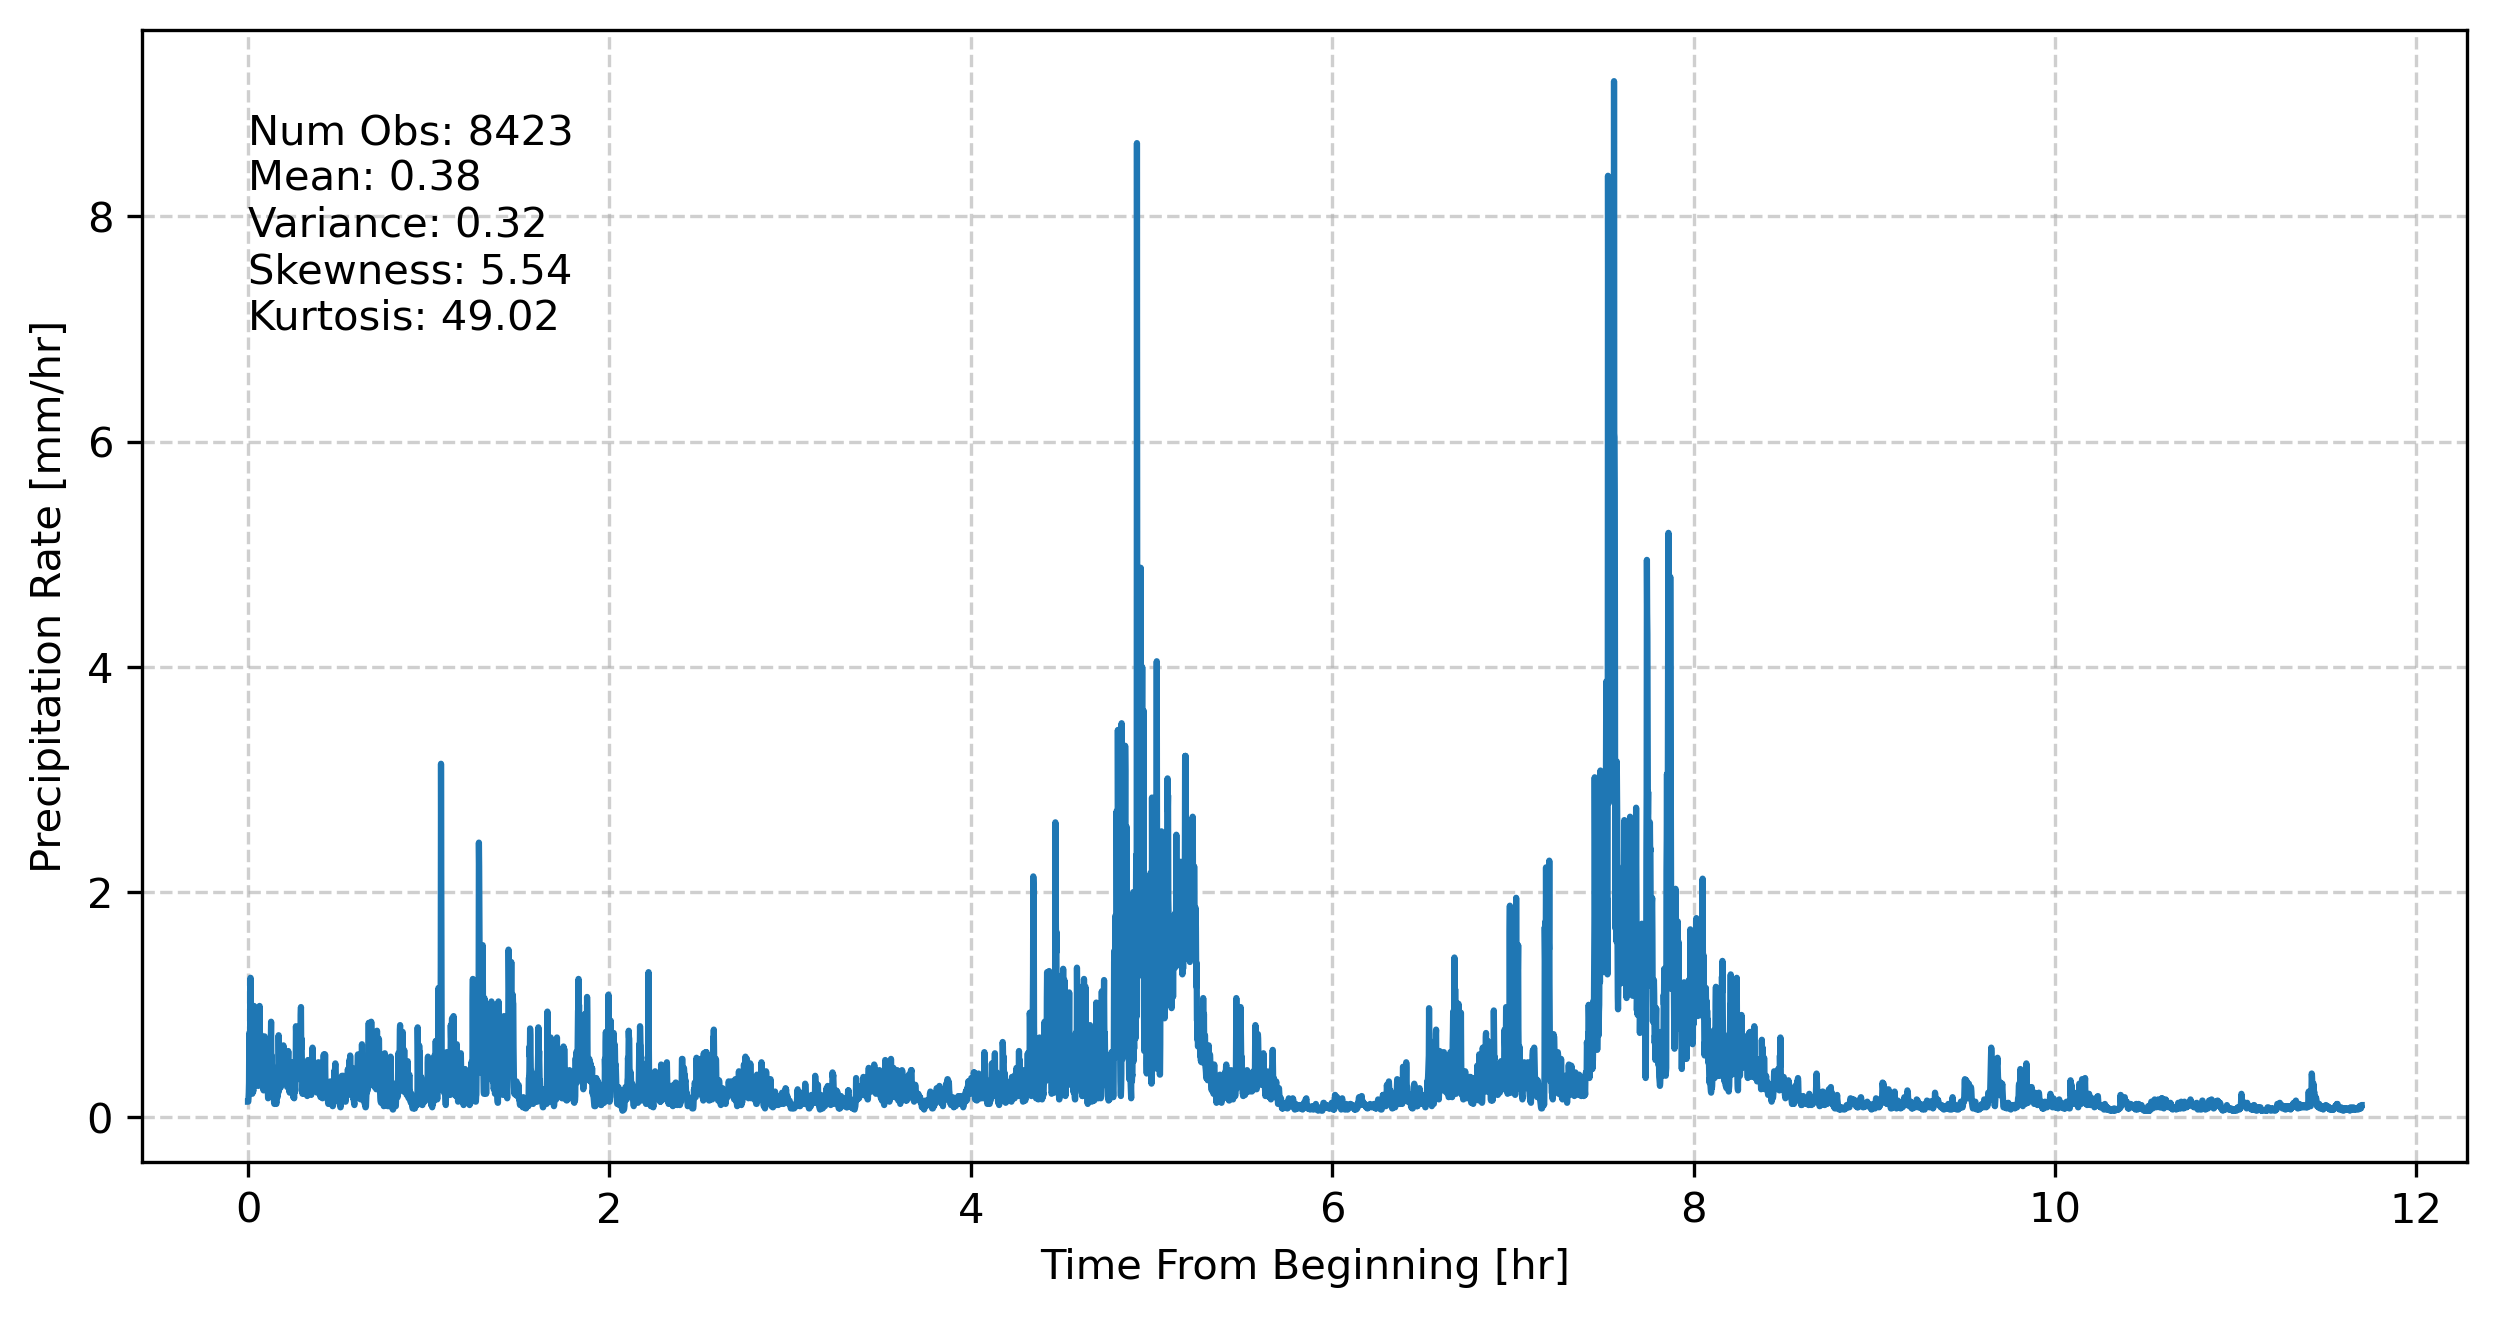

In [44]:
# part a

describe = stats.describe(data['rainfall_hourly'].values)
n = data.shape[0]

 # In seconds

fig, ax = plt.subplots(**{'figsize':(10,5), 'dpi':300})
ax.plot(data['hour'], data['rainfall_hourly'])
plot_text = f"Num Obs: {describe[0]}\n" + \
            f"Mean: {describe[2]:.2f}\n" + \
            f"Variance: {describe[3]:.2f}\n" + \
            f"Skewness: {describe[4]:.2f}\n" + \
            f"Kurtosis: {describe[5]:.2f}"
ax.annotate(plot_text, (0, 7.))
ax.set_xlabel('Time From Beginning [hr]')
ax.set_ylabel('Precipitation Rate [mm/hr]')
#ax.set_ylim(0, 7)
ax.grid(ls='--', alpha=.6)

fig.savefig('figures/ps2/rainfall.png', transparent=True)

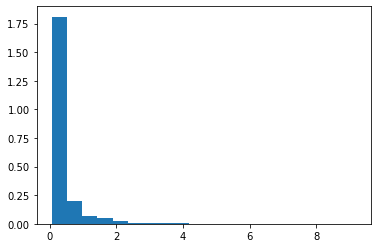

In [17]:
fig, ax = plt.subplots()

hist = ax.hist(data['rainfall'].values, density=True, bins=20)
x = np.arange(min(data['rainfall'].values),max(data['rainfall'].values), 20) # points to plot at
pdf = stats.norm.pdf(x, loc=mean, scale=std)
ax.plot(x, pdf, color='k', linewidth=2)

exp_param = stats.expon.fit(data['rainfall'].values)
gamma_param = stats.gamma.fit(data['rainfall'].values)

plt.show()
#ax.hist()

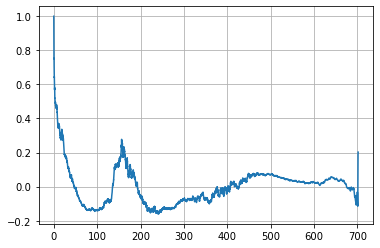

In [26]:
fig, ax = plt.subplots()

def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

def acf(series):
    n = len(series)
    data = np.asarray(series)
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2) / float(n)

    def r(h):
        acf_lag = ((data[:n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0
        return round(acf_lag, 3)
    x = np.arange(n) # Avoiding lag 0 calculation
    acf_coeffs = map(r, x)
    return acf_coeffs

autocorr = estimated_autocorrelation(rain)

ax.plot(time, autocorr)
ax.grid()
plt.show()

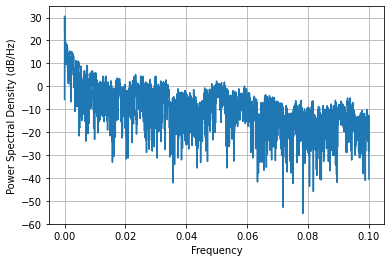

In [6]:
fig, ax = plt.subplots()

dt = 5.

ax.psd(data['rainfall'].values, 2**14, Fs=1/dt, detrend='linear')
plt.show()


In [ ]:
# Stuff from ECI 279
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

# Folsom annual inflow data
# summary statistics, histogram, QQ plot
annQ = np.loadtxt('data/folsom-annual.csv', delimiter=',', skiprows=1, usecols=[1])
N = len(annQ)

m = np.mean(annQ)
s = np.std(annQ)
g = stats.skew(annQ)

print('Mean = %f' % m)
print('Std. Dev. = %f' % s)
print('Skew Coef. = %f' % g) # no skew function in numpy

# other keyword arguments: bins, normed (for PDF instead of count)
plt.figure()
plt.hist(annQ, density=True, color='gray', edgecolor='none')

# plot the fitted pdf on top of the histogram
x = np.arange(min(annQ),max(annQ), 10) # points to plot at
pdf = stats.norm.pdf(x, loc=m, scale=s)
plt.plot(x, pdf, color='k', linewidth=2)
plt.xlabel('Inflow (TAF/yr)')
plt.ylabel('PDF')
plt.show()

# next figure - QQ plot and find PPCC
plt.figure()
quantiles = np.arange(1,N+1)/float(N+1)
Zp = stats.norm.ppf(quantiles)
Qpred = m + s*Zp
plt.scatter(Qpred, np.sort(annQ), color='red')
plt.plot([-1000,7000],[-1000,7000], color='k', linewidth=2)
plt.xlabel('Theoretical Quantiles (TAF/yr)')
plt.ylabel('Observed Quantiles (TAF/yr)')
plt.show()

r,p = stats.pearsonr(Qpred, np.sort(annQ))
print('PPCC = %f' % r)
